In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

sgd_fs = [f for f in os.listdir() if f.endswith('.npy') and ('sgd_BERT' in f) and ('10' not in f)]
sgd_fs = sorted(sgd_fs, key=lambda x: float(x.split('_')[0]))
print(sgd_fs)

sgd_only_fs = [f for f in os.listdir() if f.endswith('.npy') and ('sgd_only' in f) and ('10' not in f)]
sgd_only_fs = sorted(sgd_only_fs, key=lambda x: float(x.split('_')[0]))
print(sgd_only_fs)

['20_25000_sgd_BERT.npy', '40_25000_sgd_BERT.npy', '80_25000_sgd_BERT.npy', '160_25000_sgd_BERT.npy', '320_25000_sgd_BERT.npy']
['20_25000_sgd_only_BERT.npy', '40_25000_sgd_only_BERT.npy', '80_25000_sgd_only_BERT.npy', '160_25000_sgd_only_BERT.npy', '320_25000_sgd_only_BERT.npy']


In [2]:
losses = [np.load(file, allow_pickle=True)[0] for file in sgd_fs]
gap = [np.load(file, allow_pickle=True)[1] for file in sgd_fs]
ratio = [np.load(file, allow_pickle=True)[2] for file in sgd_fs]

losses_shadow = [np.load(file, allow_pickle=True)[3] for file in sgd_fs]
ratio_shadow = [np.load(file, allow_pickle=True)[4] for file in sgd_fs]

loss_precision = [np.load(file, allow_pickle=True)[5] for file in sgd_fs]
ratio_precision = [np.load(file, allow_pickle=True)[6] for file in sgd_fs]

loss_precision_calibrate = [np.load(file, allow_pickle=True)[7] for file in sgd_fs]
ratio_precision_calibrate = [np.load(file, allow_pickle=True)[8] for file in sgd_fs]

loss_precision_shadow = [np.load(file, allow_pickle=True)[9] for file in sgd_fs]
ratio_precision_shadow = [np.load(file, allow_pickle=True)[10] for file in sgd_fs]

nup_losses = [np.load(file, allow_pickle=True)[11] for file in sgd_fs]
nup_gap = [np.load(file, allow_pickle=True)[12] for file in sgd_fs]

nup_losses_shadow = [np.load(file, allow_pickle=True)[13] for file in sgd_fs]

nup_loss_precision = [np.load(file, allow_pickle=True)[14] for file in sgd_fs]

nup_loss_precision_shadow = [np.load(file, allow_pickle=True)[15] for file in sgd_fs]

nup_loss_precision_calibrate = [np.load(file, allow_pickle=True)[16] for file in sgd_fs]

initial_train_acc = [np.load(file, allow_pickle=True)[17] for file in sgd_fs]
initial_test_acc = [np.load(file, allow_pickle=True)[18] for file in sgd_fs]
post_train_acc = [np.load(file, allow_pickle=True)[19] for file in sgd_fs]
post_test_acc = [np.load(file, allow_pickle=True)[20] for file in sgd_fs]

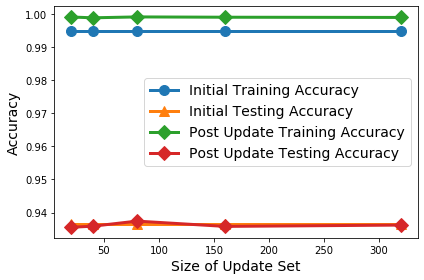

In [3]:
ds = [20, 40, 80, 160, 320]

plt.plot(ds, [np.mean(x) for x in initial_train_acc], 
         'o', label='Initial Training Accuracy', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in initial_test_acc], 
         '^', label='Initial Testing Accuracy', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in post_train_acc], 
         'D', label='Post Update Training Accuracy', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in post_test_acc], 
         'D', label='Post Update Testing Accuracy', 
         linestyle='-', linewidth=3, markersize=10)
# plt.ylim(0.5, 0.675)
plt.xlabel('Size of Update Set', fontsize=14)
plt.ylabel('Accuracy', fontsize=14) 
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()

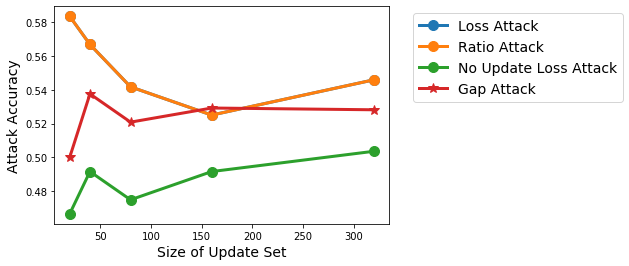

In [4]:
plt.plot(ds, [np.mean(x) for x in losses], 
         'o', label='Loss Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in ratio], 
         'o', label='Ratio Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in nup_losses], 
         'o', label='No Update Loss Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in gap], 
         '*', label='Gap Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.xlabel('Size of Update Set', fontsize=14)
plt.ylabel('Attack Accuracy', fontsize=14) 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
# plt.savefig('imdb_condensed_sgd.png')
plt.show()

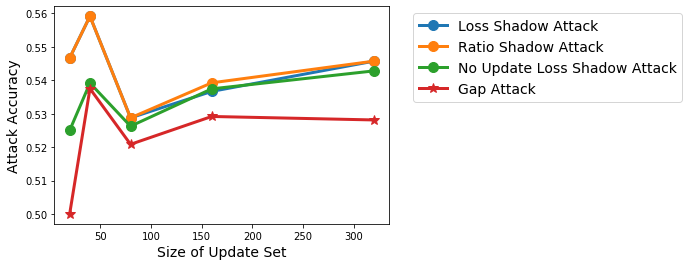

In [5]:
plt.plot(ds, [np.mean(x) for x in losses_shadow], 
         'o', label='Loss Shadow Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in ratio_shadow], 
         'o', label='Ratio Shadow Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in nup_losses_shadow], 
         'o', label='No Update Loss Shadow Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in gap], 
         '*', label='Gap Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.xlabel('Size of Update Set', fontsize=14)
plt.ylabel('Attack Accuracy', fontsize=14) 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
# plt.savefig('imdb_shadow_condensed_sgd.png')
plt.show()

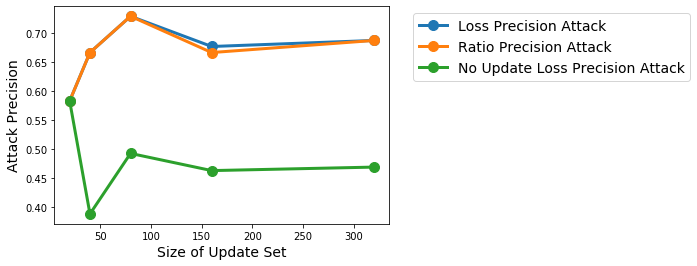

In [6]:
plt.plot(ds, [np.mean([i[0] for i in x]) for x in loss_precision], 
         'o', label='Loss Precision Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean([i[0] for i in x]) for x in ratio_precision], 
         'o', label='Ratio Precision Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean([i[0] for i in x]) for x in nup_loss_precision], 
         'o', label='No Update Loss Precision Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.xlabel('Size of Update Set', fontsize=14)
plt.ylabel('Attack Precision', fontsize=14) 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
# plt.savefig('imdb_precision_condensed_sgd.png')
plt.show()

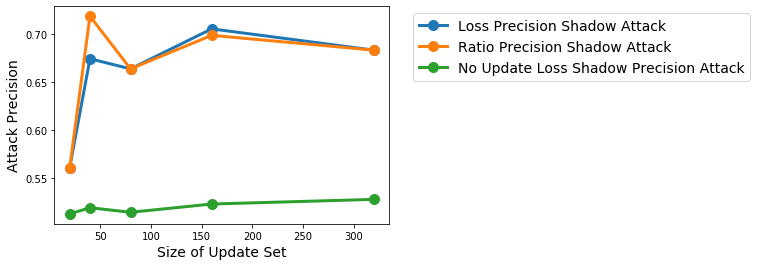

In [7]:
plt.plot(ds, [np.nanmean([i[0] for i in x]) for x in loss_precision_shadow], 
         'o', label='Loss Precision Shadow Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.nanmean([i[0] for i in x]) for x in ratio_precision_shadow], 
         'o', label='Ratio Precision Shadow Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.nanmean([i[0] for i in x]) for x in nup_loss_precision_shadow], 
         'o', label='No Update Loss Shadow Precision Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.xlabel('Size of Update Set', fontsize=14)
plt.ylabel('Attack Precision', fontsize=14) 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
# plt.savefig('imdb_shadow_precision_condensed_sgd.png')
plt.show()

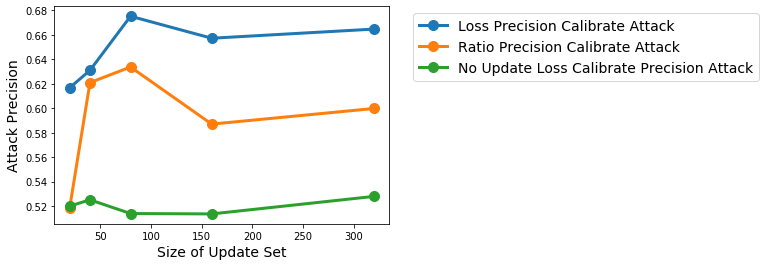

In [8]:
plt.plot(ds, [np.nanmean([i[1][0] for i in x]) for x in loss_precision_calibrate], 
         'o', label='Loss Precision Calibrate Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.nanmean([i[1][0] for i in x]) for x in ratio_precision_calibrate], 
         'o', label='Ratio Precision Calibrate Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.nanmean([i[1][0] for i in x]) for x in nup_loss_precision_calibrate], 
         'o', label='No Update Loss Calibrate Precision Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.xlabel('Size of Update Set', fontsize=14)
plt.ylabel('Attack Precision', fontsize=14) 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
# plt.savefig('imdb_calibrate_precision_condensed_sgd.png')
plt.show()

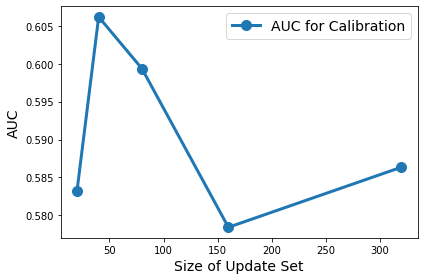

0.5832571706526938 0.5784264212094261


In [9]:
from sklearn.metrics import auc

total_precisions = [[np.nanmean([i[percentile][0] for i in x]) for percentile in range(11)] for x in loss_precision_calibrate]
total_recalls = [[np.nanmean([i[percentile][1] for i in x]) for percentile in range(11)] for x in loss_precision_calibrate]
aucs = []

for precisions, recalls in zip(total_precisions, total_recalls):
#     print(precisions)
#     print(recalls)
#     print('===============')
    aucs.append(auc(recalls, precisions))
    
plt.plot(ds, aucs, 
         'o', label='AUC for Calibration', 
         linestyle='-', linewidth=3, markersize=10)
plt.xlabel('Size of Update Set', fontsize=14)
plt.ylabel('AUC', fontsize=14) 
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()

print(aucs[0], aucs[3])

In [10]:
losses = [np.load(file, allow_pickle=True)[0] for file in sgd_only_fs]
gap = [np.load(file, allow_pickle=True)[1] for file in sgd_only_fs]
ratio = [np.load(file, allow_pickle=True)[2] for file in sgd_only_fs]

losses_shadow = [np.load(file, allow_pickle=True)[3] for file in sgd_only_fs]
ratio_shadow = [np.load(file, allow_pickle=True)[4] for file in sgd_only_fs]

loss_precision = [np.load(file, allow_pickle=True)[5] for file in sgd_only_fs]
ratio_precision = [np.load(file, allow_pickle=True)[6] for file in sgd_only_fs]

loss_precision_calibrate = [np.load(file, allow_pickle=True)[7] for file in sgd_only_fs]
ratio_precision_calibrate = [np.load(file, allow_pickle=True)[8] for file in sgd_only_fs]

loss_precision_shadow = [np.load(file, allow_pickle=True)[9] for file in sgd_only_fs]
ratio_precision_shadow = [np.load(file, allow_pickle=True)[10] for file in sgd_only_fs]

nup_losses = [np.load(file, allow_pickle=True)[11] for file in sgd_only_fs]
nup_gap = [np.load(file, allow_pickle=True)[12] for file in sgd_only_fs]

nup_losses_shadow = [np.load(file, allow_pickle=True)[13] for file in sgd_only_fs]

nup_loss_precision = [np.load(file, allow_pickle=True)[14] for file in sgd_only_fs]

nup_loss_precision_shadow = [np.load(file, allow_pickle=True)[15] for file in sgd_only_fs]

nup_loss_precision_calibrate = [np.load(file, allow_pickle=True)[16] for file in sgd_only_fs]

initial_train_acc = [np.load(file, allow_pickle=True)[17] for file in sgd_only_fs]
initial_test_acc = [np.load(file, allow_pickle=True)[18] for file in sgd_only_fs]
post_train_acc = [np.load(file, allow_pickle=True)[19] for file in sgd_only_fs]
post_test_acc = [np.load(file, allow_pickle=True)[20] for file in sgd_only_fs]

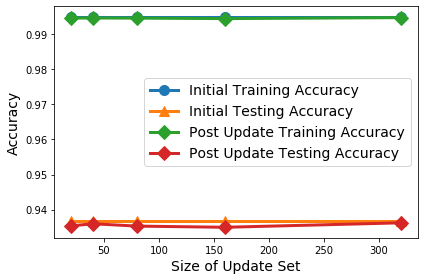

In [11]:
ds = [20, 40, 80, 160, 320]

plt.plot(ds, [np.mean(x) for x in initial_train_acc], 
         'o', label='Initial Training Accuracy', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in initial_test_acc], 
         '^', label='Initial Testing Accuracy', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in post_train_acc], 
         'D', label='Post Update Training Accuracy', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in post_test_acc], 
         'D', label='Post Update Testing Accuracy', 
         linestyle='-', linewidth=3, markersize=10)
# plt.ylim(0.5, 0.675)
plt.xlabel('Size of Update Set', fontsize=14)
plt.ylabel('Accuracy', fontsize=14) 
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()

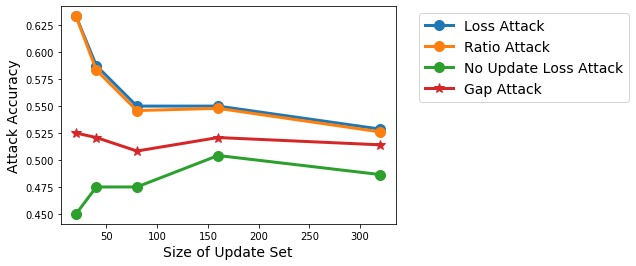

In [12]:
plt.plot(ds, [np.mean(x) for x in losses], 
         'o', label='Loss Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in ratio], 
         'o', label='Ratio Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in nup_losses], 
         'o', label='No Update Loss Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in gap], 
         '*', label='Gap Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.xlabel('Size of Update Set', fontsize=14)
plt.ylabel('Attack Accuracy', fontsize=14) 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
# plt.savefig('imdb_condensed_sgd_only.png')
plt.show()

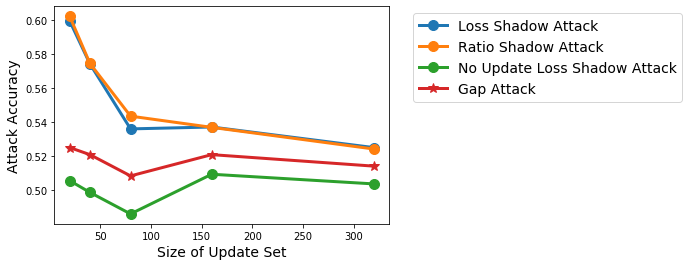

In [13]:
plt.plot(ds, [np.mean(x) for x in losses_shadow], 
         'o', label='Loss Shadow Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in ratio_shadow], 
         'o', label='Ratio Shadow Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in nup_losses_shadow], 
         'o', label='No Update Loss Shadow Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in gap], 
         '*', label='Gap Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.xlabel('Size of Update Set', fontsize=14)
plt.ylabel('Attack Accuracy', fontsize=14) 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
# plt.savefig('imdb_shadow_condensed_sgd_only.png')
plt.show()

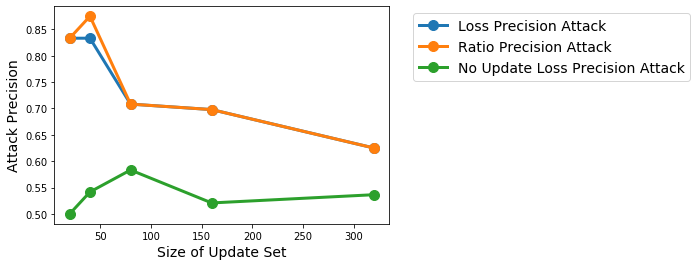

In [14]:
plt.plot(ds, [np.mean([i[0] for i in x]) for x in loss_precision], 
         'o', label='Loss Precision Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean([i[0] for i in x]) for x in ratio_precision], 
         'o', label='Ratio Precision Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean([i[0] for i in x]) for x in nup_loss_precision], 
         'o', label='No Update Loss Precision Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.xlabel('Size of Update Set', fontsize=14)
plt.ylabel('Attack Precision', fontsize=14) 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
# plt.savefig('imdb_precision_condensed_sgd_only.png')
plt.show()

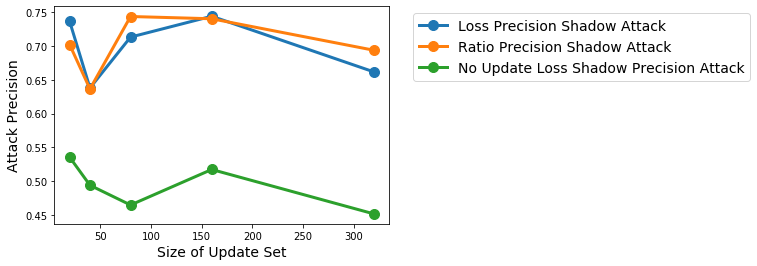

In [15]:
plt.plot(ds, [np.nanmean([i[0] for i in x]) for x in loss_precision_shadow], 
         'o', label='Loss Precision Shadow Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.nanmean([i[0] for i in x]) for x in ratio_precision_shadow], 
         'o', label='Ratio Precision Shadow Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.nanmean([i[0] for i in x]) for x in nup_loss_precision_shadow], 
         'o', label='No Update Loss Shadow Precision Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.xlabel('Size of Update Set', fontsize=14)
plt.ylabel('Attack Precision', fontsize=14) 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
# plt.savefig('imdb_shadow_precision_condensed_sgd_only.png')
plt.show()

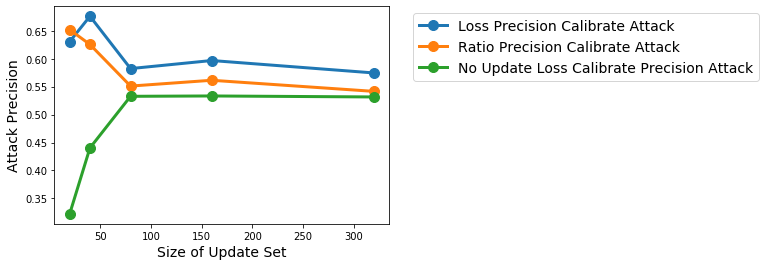

In [16]:
plt.plot(ds, [np.nanmean([i[2][0] for i in x]) for x in loss_precision_calibrate], 
         'o', label='Loss Precision Calibrate Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.nanmean([i[2][0] for i in x]) for x in ratio_precision_calibrate], 
         'o', label='Ratio Precision Calibrate Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.nanmean([i[2][0] for i in x]) for x in nup_loss_precision_calibrate], 
         'o', label='No Update Loss Calibrate Precision Attack', 
         linestyle='-', linewidth=3, markersize=10)
plt.xlabel('Size of Update Set', fontsize=14)
plt.ylabel('Attack Precision', fontsize=14) 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)
# plt.savefig('imdb_calibrate_precision_condensed_sgd_only.png')
plt.show()

C:\Users\Stanley Wu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until


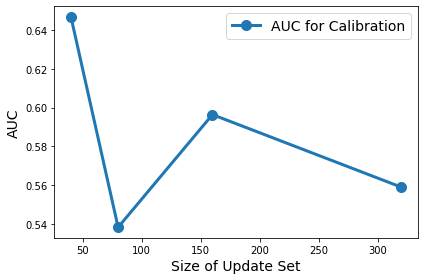

nan 0.5963332505955806


In [17]:
from sklearn.metrics import auc

total_precisions = [[np.nanmean([i[percentile][0] for i in x]) for percentile in range(11)] for x in loss_precision_calibrate]
total_recalls = [[np.nanmean([i[percentile][1] for i in x]) for percentile in range(11)] for x in loss_precision_calibrate]
aucs = []

for precisions, recalls in zip(total_precisions, total_recalls):
#     print(precisions)
#     print(recalls)
#     print('===============')
    aucs.append(auc(recalls, precisions))
    
plt.plot(ds, aucs, 
         'o', label='AUC for Calibration', 
         linestyle='-', linewidth=3, markersize=10)
plt.xlabel('Size of Update Set', fontsize=14)
plt.ylabel('AUC', fontsize=14) 
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()
print(aucs[0], aucs[3])

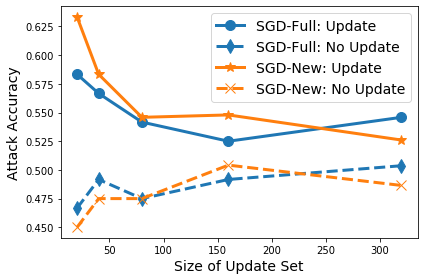

In [18]:
ds = [20, 40, 80, 160, 320]

ratio_median_sgd = [np.load(file, allow_pickle=True)[2] for file in sgd_fs]
ratio_median_sgd_only = [np.load(file, allow_pickle=True)[2] for file in sgd_only_fs]
ratio_shadow_sgd = [np.load(file, allow_pickle=True)[4] for file in sgd_fs]
ratio_shadow_sgd_only = [np.load(file, allow_pickle=True)[4] for file in sgd_only_fs]
nup_losses_median_sgd = [np.load(file, allow_pickle=True)[11] for file in sgd_fs]
nup_losses_median_sgd_only = [np.load(file, allow_pickle=True)[11] for file in sgd_only_fs]

plt.plot(ds, [np.mean(x) for x in ratio_median_sgd], 
         'o', label='SGD-Full: Update', color='C0',
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in nup_losses_median_sgd], 
         'd', label='SGD-Full: No Update', color='C0',
         linestyle='--', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in ratio_median_sgd_only], 
         '*', label='SGD-New: Update', color='C1',
         linestyle='-', linewidth=3, markersize=10)
plt.plot(ds, [np.mean(x) for x in nup_losses_median_sgd_only], 
         'x', label='SGD-New: No Update', color='C1', 
         linestyle='--', linewidth=3, markersize=10)
plt.xlabel('Size of Update Set', fontsize=14)
plt.ylabel('Attack Accuracy', fontsize=14) 
plt.legend(fontsize=14)
plt.tight_layout()
plt.savefig('imdb_condensed.png')
plt.show()

In [19]:
nup_loss_precision = [np.load(file, allow_pickle=True)[14] for file in sgd_fs]
print(np.mean([x[0] for x in nup_loss_precision[0]]), np.mean([x[1] for x in nup_loss_precision[0]]))
print(np.mean([x[0] for x in nup_loss_precision[3]]), np.mean([x[1] for x in nup_loss_precision[3]]))
print('==================')

ratio_precision = [np.load(file, allow_pickle=True)[6] for file in sgd_fs]
print(np.mean([x[0] for x in ratio_precision[0]]), np.mean([x[1] for x in ratio_precision[0]]))
print(np.mean([x[0] for x in ratio_precision[3]]), np.mean([x[1] for x in ratio_precision[3]]))
print('==================')

ratio_precision_shadow = [np.load(file, allow_pickle=True)[10] for file in sgd_fs]
print(np.nanmean([x[0] for x in ratio_precision_shadow[0]]), np.nanmean([x[1] for x in ratio_precision_shadow[0]]))
print(np.nanmean([x[0] for x in ratio_precision_shadow[3]]), np.nanmean([x[1] for x in ratio_precision_shadow[3]]))
print('==================')

ratio_precision_calibrate = [np.load(file, allow_pickle=True)[8] for file in sgd_fs]
print(np.mean([x[1][0] for x in ratio_precision_calibrate[0]]), np.mean([x[1][1] for x in ratio_precision_calibrate[0]]))
print(np.mean([x[1][0] for x in ratio_precision_calibrate[3]]), np.mean([x[1][1] for x in ratio_precision_calibrate[3]]))
print('==================')

0.5833333333333334 0.11666666666666668
0.4634578544061302 0.08750000000000001
0.5833333333333334 0.11666666666666668
0.6666666666666666 0.1333333333333333
0.5602346999405822 0.3166666666666666
0.6989363513190443 0.11652777777777777
0.5185185185185185 0.25
0.5869582632380037 0.24791666666666662


In [20]:
nup_loss_precision = [np.load(file, allow_pickle=True)[14] for file in sgd_only_fs]
print(np.mean([x[0] for x in nup_loss_precision[0]]), np.mean([x[1] for x in nup_loss_precision[0]]))
print(np.mean([x[0] for x in nup_loss_precision[3]]), np.mean([x[1] for x in nup_loss_precision[3]]))
print('==================')

ratio_precision = [np.load(file, allow_pickle=True)[6] for file in sgd_only_fs]
print(np.mean([x[0] for x in ratio_precision[0]]), np.mean([x[1] for x in ratio_precision[0]]))
print(np.mean([x[0] for x in ratio_precision[3]]), np.mean([x[1] for x in ratio_precision[3]]))
print('==================')

ratio_precision_shadow = [np.load(file, allow_pickle=True)[10] for file in sgd_only_fs]
print(np.nanmean([x[0] for x in ratio_precision_shadow[0]]), np.nanmean([x[1] for x in ratio_precision_shadow[0]]))
print(np.nanmean([x[0] for x in ratio_precision_shadow[3]]), np.nanmean([x[1] for x in ratio_precision_shadow[3]]))
print('==================')

ratio_precision_calibrate = [np.load(file, allow_pickle=True)[8] for file in sgd_only_fs]
print(np.mean([x[0][0] for x in ratio_precision_calibrate[0]]), np.mean([x[0][1] for x in ratio_precision_calibrate[0]]))
print(np.mean([x[0][0] for x in ratio_precision_calibrate[3]]), np.mean([x[0][1] for x in ratio_precision_calibrate[3]]))
print('==================')

0.5 0.09999999999999996
0.5208333333333334 0.10416666666666667
0.8333333333333334 0.16666666666666666
0.6979166666666666 0.13958333333333334
0.7016967243283034 0.3422222222222222
0.7399149803991862 0.13583333333333336
0.7523809523809523 0.21666666666666667
0.6943601463664407 0.16458333333333333


In [21]:
nup_gap = [np.load(file, allow_pickle=True)[12] for file in sgd_fs]
print(np.mean([x for x in nup_gap[0]]))
print('==================')

nup_losses = [np.load(file, allow_pickle=True)[11] for file in sgd_fs]
print(np.mean([x for x in nup_losses[0]]))
print('==================')

losses = [np.load(file, allow_pickle=True)[0] for file in sgd_fs]
print(np.nanmean([x for x in losses[0]]))
print('==================')

losses_shadow = [np.load(file, allow_pickle=True)[3] for file in sgd_fs]
print(np.mean([x for x in losses_shadow[0]]))
print('==================')

ratio = [np.load(file, allow_pickle=True)[2] for file in sgd_fs]
print(np.mean([x for x in ratio[0]]))
print('==================')

ratio_shadow = [np.load(file, allow_pickle=True)[4] for file in sgd_fs]
print(np.mean([x for x in ratio_shadow[0]]))
print('==================')

0.5
0.46666666666666673
0.5833333333333334
0.5466666666666666
0.5833333333333334
0.5466666666666666


In [22]:
nup_gap = [np.load(file, allow_pickle=True)[12] for file in sgd_only_fs]
print(np.mean([x for x in nup_gap[0]]))
print('==================')

nup_losses = [np.load(file, allow_pickle=True)[11] for file in sgd_only_fs]
print(np.mean([x for x in nup_losses[0]]))
print('==================')

losses = [np.load(file, allow_pickle=True)[0] for file in sgd_only_fs]
print(np.nanmean([x for x in losses[0]]))
print('==================')

losses_shadow = [np.load(file, allow_pickle=True)[3] for file in sgd_only_fs]
print(np.mean([x for x in losses_shadow[0]]))
print('==================')

ratio = [np.load(file, allow_pickle=True)[2] for file in sgd_only_fs]
print(np.mean([x for x in ratio[0]]))
print('==================')

ratio_shadow = [np.load(file, allow_pickle=True)[4] for file in sgd_only_fs]
print(np.mean([x for x in ratio_shadow[0]]))
print('==================')

0.5
0.45000000000000007
0.6333333333333334
0.5994444444444444
0.6333333333333334
0.6022222222222221
